# Creating the dataset from Pizagno et al. (2007)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308)

### Loading the samples

In [2]:
file = './raw_data/Pizagno_2007.txt'
data = np.genfromtxt(file, usecols=(0), dtype="str")
galaxy_names = data[:] # SDSS Galaxy identifier

data = np.genfromtxt(file)
i_mag = data[:, 5]
i_mag_solar = 4.11
I_Lum = 10**(0.4 * (i_mag_solar - i_mag))
ms = I_Lum * 1.2
size = data[:, 10]
Vcirc = data[:, 15]

Msun_in_cgs = 1.98848e33
kpc_in_cgs = 3.08567758e21
G = 6.67408e-11 #(m/s)^2 m kg^-1 
G *= 1e2 * 1e-3 #(m/s)^2 cm g^-1 
G *= Msun_in_cgs #(m/s)^2 cm Msun^-1 
G /= (1e3)**2 #(km/s)^2 cm Msun^-1 
G /= kpc_in_cgs #(km/s)^2 kpc Msun^-1

Mtotal = Vcirc**2 * size # [(km/s)^2 x kpc]
Mtotal /= G # [Msun]

select = np.where((Mtotal>0) & (size>0))[0] # Removing bad estimates
galaxy_names = galaxy_names[select]
size = size[select]
Mtotal = Mtotal[select]
ms = ms[select]
num_sample = len(galaxy_names)

Mstellar = 1.95 * (0.5 * ms)

fDM = (Mtotal - Mstellar) / Mtotal

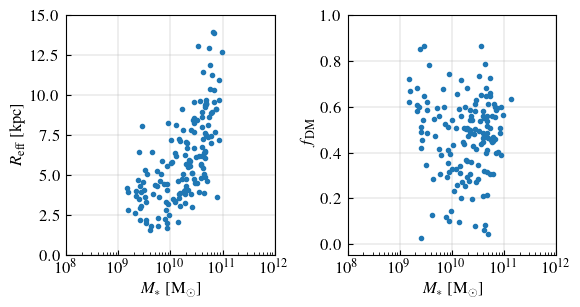

In [3]:
#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (7, 3),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.35,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure()
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(ms, size, 'o', ms=3)

plt.axis([1e8, 1e12, 0, 15])
plt.xscale('log')
plt.ylabel(r"$R_{\mathrm{eff}}$ [kpc]")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

######
ax = plt.subplot(1, 2, 2)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(ms, fDM, 'o', c='tab:blue', ms=3)

plt.axis([1e8, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.show()

In [4]:
# Writing the data into a CSV file
with open('dataset/Pizagno2007.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Writing the name line and the unit line
    writer.writerow(["GalaxyName","M*[Msun]", "Reff[kpc]","fDM(Reff)"])

    # Looping through each element of the data
    for i in range(num_sample):

        Name = galaxy_names[i]
        Mi = ms[i]
        fDMi = fDM[i]
        Ri = size[i]
        # Writing the data into the CSV file
        writer.writerow([Name, Mi, Ri, fDMi])
        

In [5]:
# Reading the CSV file into a DataFrame
Pizagno2007 = pd.read_csv('dataset/Pizagno2007.csv')
Pizagno2007

,GalaxyName,M*[Msun],Reff[kpc],fDM(Reff)
0,J001006.62-002609.6,1.884435e+10,3.82,-0.305068
1,J001708.77-005728.9,6.717091e+09,5.11,0.677218
2,J001947.33+003526.7,5.904474e+09,1.83,-0.872660
3,J002025.78+004934.9,1.687257e+10,9.15,0.507479
4,J003112.09-002426.4,1.510710e+10,3.11,0.203308
...,...,...,...,...
157,J235106.25+010324.0,6.655509e+10,13.95,0.555902
158,J235603.89-000958.6,8.456317e+09,5.57,0.352791
159,J235607.82+003258.1,2.183641e+10,4.12,0.587178
160,J235624.68-001739.6,3.366520e+09,3.32,0.484024
